In [1]:
import pandas as pd
import numpy as np
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
Y = breast_cancer_wisconsin_diagnostic.data.targets
df = X.copy()

In [3]:
def Pascal_Case(s):
  s = s.title()
  s = s.replace("_","")
  s = " ".join(s.split())
  return s

df.columns = [Pascal_Case(c) for c in df.columns]

In [4]:
print(df.head)

<bound method NDFrame.head of      Radius1  Texture1  Perimeter1   Area1  Smoothness1  Compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  Radius3  \
0       0.3001

In [5]:
#print(df.tail)

In [6]:
#print(df.describe)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

In [8]:
df_null = df.isnull()
row_nans = []
for i in range(df_null.shape[0]):
  for j in range(df_null.shape[1]):
    if df_null.iloc[i,j] == True:
      row_nans.append(i)

print(row_nans)

#df_dropped = df.drop(df.index[row_nans])
#df = df_dropped

[]


4. El dataset no tiene valores nulos, pero si los tuviera, podrían reemplazarse con un modelo que toma en cuenta los valores no nulos para predecir los valores nulos.

In [9]:
df["Diagnosis"] = Y["Diagnosis"]
print(np.unique(df["Diagnosis"]))

['B' 'M']


<Axes: xlabel='count', ylabel='Diagnosis'>

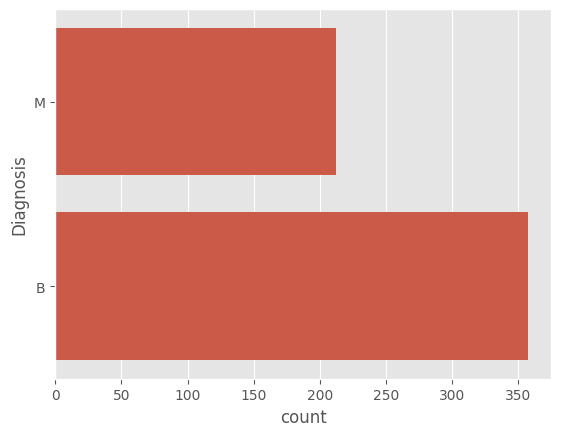

In [10]:
sns.countplot(df["Diagnosis"])

6. Hay alrededor de 200 casos malignos y 350 casos benignos.

In [11]:
Diagnosis_Numeric = []
for i in range(len(df["Diagnosis"])):
  if df["Diagnosis"][i] == "M":
    Diagnosis_Numeric.append(1)
  else:
    Diagnosis_Numeric.append(0)

df["Diagnosis_Numeric"] = Diagnosis_Numeric

In [12]:
for i in range(df.shape[0]):
  for j in range(df.shape[1]-2):
    df.iloc[i,j] = (df.iloc[i,j]-np.mean(df.iloc[:,j]))/np.std(df.iloc[:,j])

In [13]:
letters = ["R","T","P","A","Sm","Com","Concavi","Concave","Sy","F"]
new_columns = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
new_df = pd.DataFrame()
for j in range(len(letters)):
  store = []
  for i in range(len(df.columns)):
    if df.columns[i].startswith(letters[j]):
      store.append(df.columns[i])
  new_df[new_columns[j]] = np.zeros(df.shape[0])
  for k in range(df.shape[0]):
    new_df.loc[k,new_columns[j]] = np.mean(np.array([df.loc[k,store[0]],df.loc[k,store[1]],df.loc[k,store[2]]]))

print(new_df)

     RadiusMean  TextureMean  PerimeterMean   AreaMean  SmoothnessMean  \
0      1.824496    -1.332631       2.135522   1.824397        0.887384   
1      1.364881    -0.521579       1.161896   1.520303       -0.188643   
2      1.417677    -0.104555       1.256121   1.411789        0.114152   
3     -0.224768     0.105095      -0.156676  -0.518711        0.757118   
4      1.403701    -1.051897       1.454932   1.428745        0.115152   
..          ...          ...            ...        ...             ...   
564    7.485572     5.403168      10.131439  15.272756        0.144843   
565    7.340343     8.201541      10.184267  15.340335        0.043563   
566    6.264121     7.952523       9.624800  12.021532        0.008032   
567    8.928796    10.051512      16.148426  22.622344        0.187259   
568    3.339940     9.573686      12.797734  18.281060       -0.106498   

     CompactnessMean  ConcavityMean  ConcavePointsMean  SymmetryMean  \
0           2.405680       1.828809    

<Axes: xlabel='RadiusMean', ylabel='Count'>

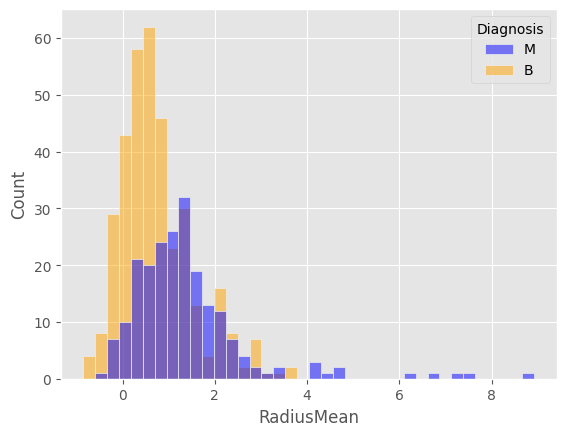

In [14]:
new_df["Diagnosis"] = df["Diagnosis"]
sns.histplot(data=new_df,x="RadiusMean",hue="Diagnosis",palette=["blue","orange"])

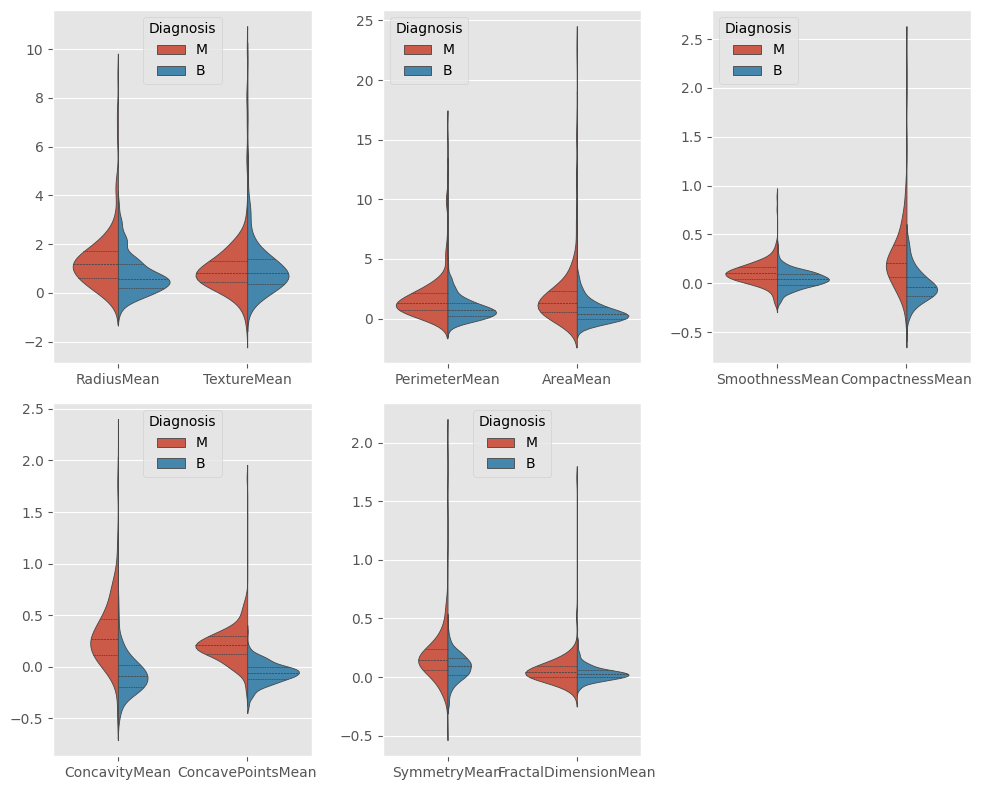

In [15]:
data1 = pd.melt(new_df.iloc[:, 0:11], id_vars="Diagnosis", value_vars=['RadiusMean', 'TextureMean'],value_name="value")
data2 = pd.melt(new_df.iloc[:, 0:11], id_vars="Diagnosis", value_vars=['PerimeterMean', 'AreaMean'],value_name="value")
data3 = pd.melt(new_df.iloc[:, 0:11], id_vars="Diagnosis", value_vars=['SmoothnessMean', 'CompactnessMean'],value_name="value")
data4 = pd.melt(new_df.iloc[:, 0:11], id_vars="Diagnosis", value_vars=['ConcavityMean', 'ConcavePointsMean'],value_name="value")
data5 = pd.melt(new_df.iloc[:, 0:11], id_vars="Diagnosis", value_vars=['SymmetryMean', 'FractalDimensionMean'],value_name="value")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
ax1 = sns.violinplot(x="variable", y="value", hue="Diagnosis", data=data1, split=True, inner="quart",ax=axes[0, 0])
ax2 = sns.violinplot(x="variable", y="value", hue="Diagnosis", data=data2, split=True, inner="quart",ax=axes[0, 1])
ax3 = sns.violinplot(x="variable", y="value", hue="Diagnosis", data=data3, split=True, inner="quart",ax=axes[0, 2])
ax4 = sns.violinplot(x="variable", y="value", hue="Diagnosis", data=data4, split=True, inner="quart",ax=axes[1, 0])
ax5 = sns.violinplot(x="variable", y="value", hue="Diagnosis", data=data5, split=True, inner="quart",ax=axes[1, 1])
ax1.set(xlabel=None, ylabel=None)
ax2.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)
ax4.set(xlabel=None, ylabel=None)
ax5.set(xlabel=None, ylabel=None)
axes[1, 2].set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='RadiusMean'>

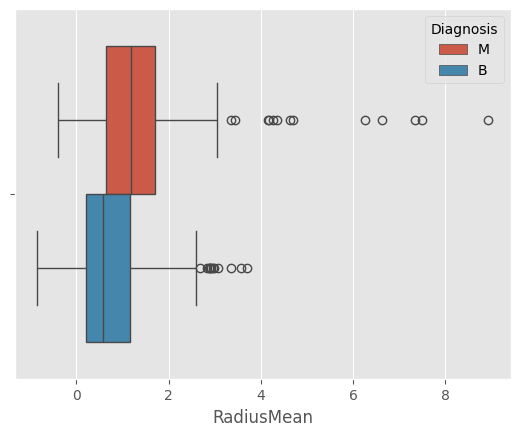

In [16]:
sns.boxplot(data=new_df,x="RadiusMean",hue="Diagnosis")


<Axes: xlabel='RadiusMean'>

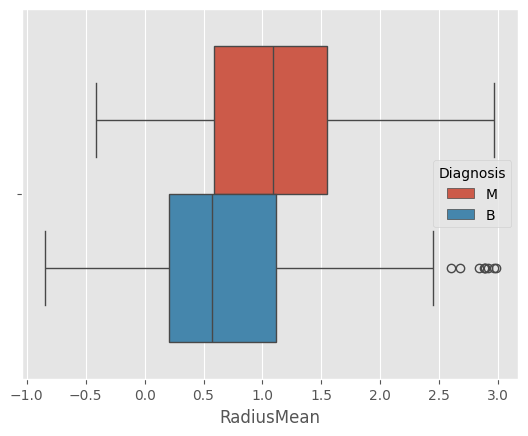

In [17]:
Q1 = new_df['RadiusMean'].quantile(0.25)
Q3 = new_df['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1
new_df2 = new_df[~((new_df['RadiusMean'] < (Q1 - 1.5 * IQR)) | (new_df['RadiusMean'] > (Q3 + 1.5 * IQR)))]
sns.boxplot(data=new_df2,x="RadiusMean",hue="Diagnosis")

In [18]:
new_df = new_df.drop("Diagnosis",axis=1)
matrix = new_df.corr()
print(matrix)

                      RadiusMean  TextureMean  PerimeterMean  AreaMean  \
RadiusMean              1.000000     0.757211       0.955916  0.911273   
TextureMean             0.757211     1.000000       0.798817  0.703687   
PerimeterMean           0.955916     0.798817       1.000000  0.970626   
AreaMean                0.911273     0.703687       0.970626  1.000000   
SmoothnessMean          0.114761     0.026864       0.104748  0.084113   
CompactnessMean         0.266982     0.099867       0.269091  0.238601   
ConcavityMean           0.319231     0.107004       0.307836  0.298431   
ConcavePointsMean       0.434288     0.069617       0.391568  0.391594   
SymmetryMean            0.138959     0.059378       0.146317  0.110700   
FractalDimensionMean    0.048360     0.030936       0.067667  0.022548   

                      SmoothnessMean  CompactnessMean  ConcavityMean  \
RadiusMean                  0.114761         0.266982       0.319231   
TextureMean                 0.026864     

<Axes: >

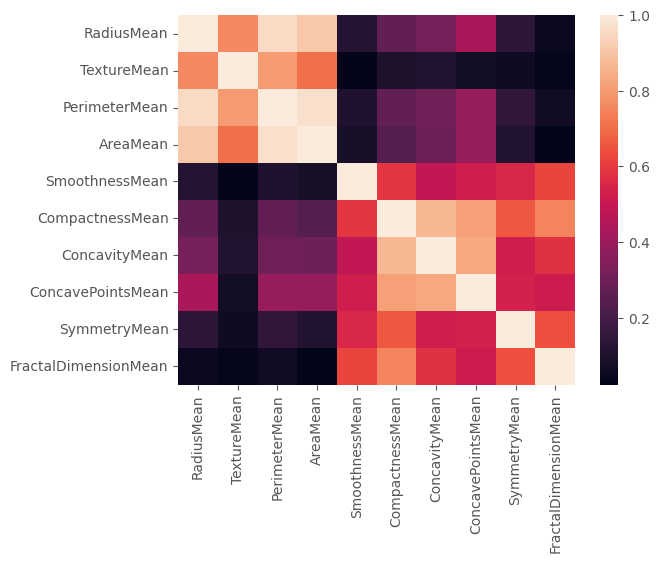

In [19]:
sns.heatmap(matrix)

14. Se podrían usar gráficos de dispersión para observar si existe algún tipo de correlación entre dos características agrupando los datos según el diagnóstico.